In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
training_data = pd.read_csv('Train_Breast_Cancer.csv')

In [3]:
training_data.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
training_data.tail()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
268,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
269,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
270,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
271,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
272,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [5]:
training_data.shape

(273, 10)

In [6]:
training_data.columns

Index(['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps',
       'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'],
      dtype='object')

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        273 non-null    object
 1   Age          273 non-null    object
 2   Menopause    273 non-null    object
 3   Tumor-size   273 non-null    object
 4   Inv-nodes    273 non-null    object
 5   Node-caps    273 non-null    object
 6   Deg-malig    273 non-null    int64 
 7   Breast       273 non-null    object
 8   Breast-quad  273 non-null    object
 9   Irradiat     273 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.5+ KB


In [8]:
training_data.describe()

,Deg-malig
count,273.000000
mean,2.043956
std,0.741304
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [9]:
training_data.isnull().sum()

Class          0
Age            0
Menopause      0
Tumor-size     0
Inv-nodes      0
Node-caps      0
Deg-malig      0
Breast         0
Breast-quad    0
Irradiat       0
dtype: int64

In [10]:
training_data.nunique()

Class           2
Age             6
Menopause       3
Tumor-size     11
Inv-nodes       7
Node-caps       3
Deg-malig       3
Breast          2
Breast-quad     6
Irradiat        2
dtype: int64

In [11]:
training_data.Class.unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [12]:
training_data.Class.value_counts()

no-recurrence-events    189
recurrence-events        84
Name: Class, dtype: int64

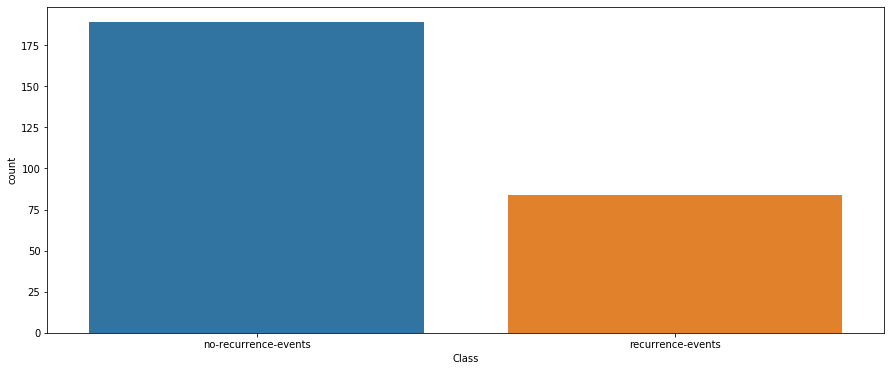

In [13]:
plt.figure(figsize=(15,6))
sns.countplot('Class', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [14]:
training_data.Age.unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [15]:
training_data.Age.value_counts()

50-59    92
40-49    86
60-69    55
30-39    33
70-79     6
20-29     1
Name: Age, dtype: int64

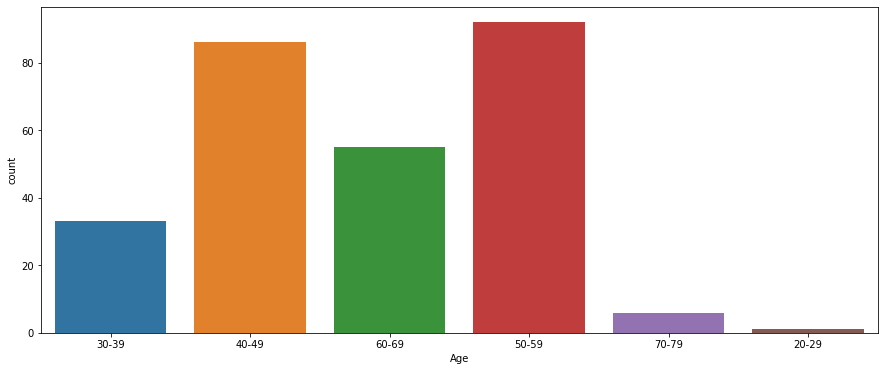

In [16]:
plt.figure(figsize=(15,6))
sns.countplot('Age', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [17]:
training_data.Menopause.unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [18]:
training_data.Menopause.value_counts()

premeno    142
ge40       125
lt40         6
Name: Menopause, dtype: int64

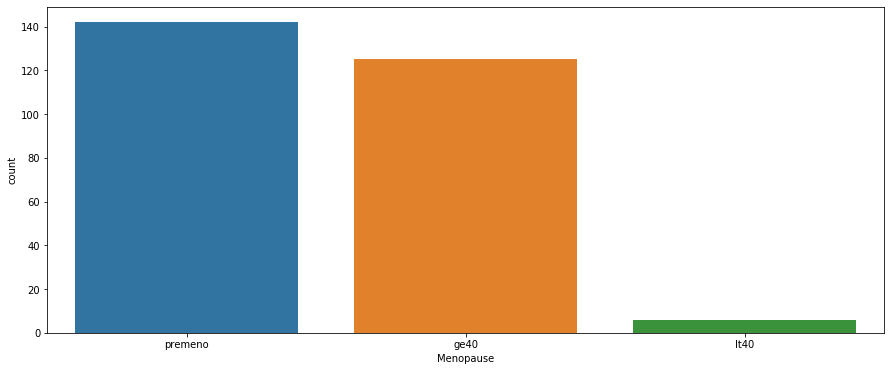

In [19]:
plt.figure(figsize=(15,6))
sns.countplot('Menopause', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [20]:
training_data = training_data.rename(columns={'Tumor-size': 'Tumor_size', 
                                              'Inv-nodes': 'Inv_nodes',
                                             'Node-caps': 'Node_caps',
                                             'Deg-malig': 'Deg_malig',
                                             'Breast-quad': 'Breast_quad'})

In [21]:
training_data.columns

Index(['Class', 'Age', 'Menopause', 'Tumor_size', 'Inv_nodes', 'Node_caps',
       'Deg_malig', 'Breast', 'Breast_quad', 'Irradiat'],
      dtype='object')

In [22]:
training_data.Tumor_size.unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [23]:
training_data.Tumor_size.value_counts()

30-34    57
25-29    51
20-24    48
15-19    30
10-14    28
40-44    19
35-39    17
50-54     8
0-4       8
5-9       4
45-49     3
Name: Tumor_size, dtype: int64

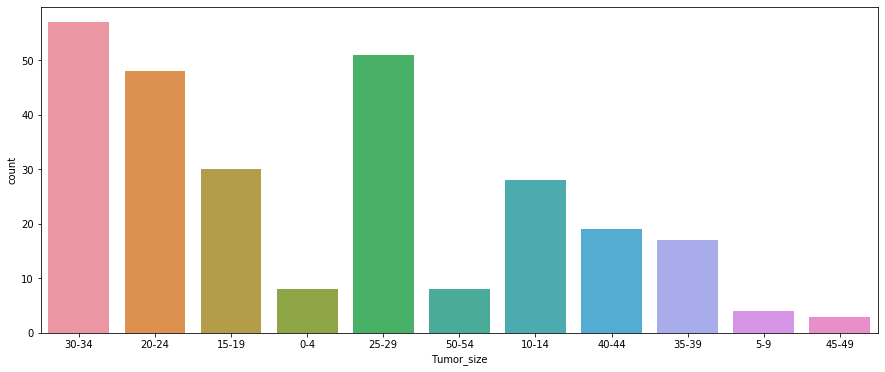

In [24]:
plt.figure(figsize=(15,6))
sns.countplot('Tumor_size', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [25]:
training_data.Inv_nodes.unique()

array(['0-2', '6-8', '3-5', '15-17', '9-11', '12-14', '24-26'],
      dtype=object)

In [26]:
training_data.Inv_nodes.value_counts()

0-2      209
3-5       32
6-8       15
9-11       7
15-17      6
12-14      3
24-26      1
Name: Inv_nodes, dtype: int64

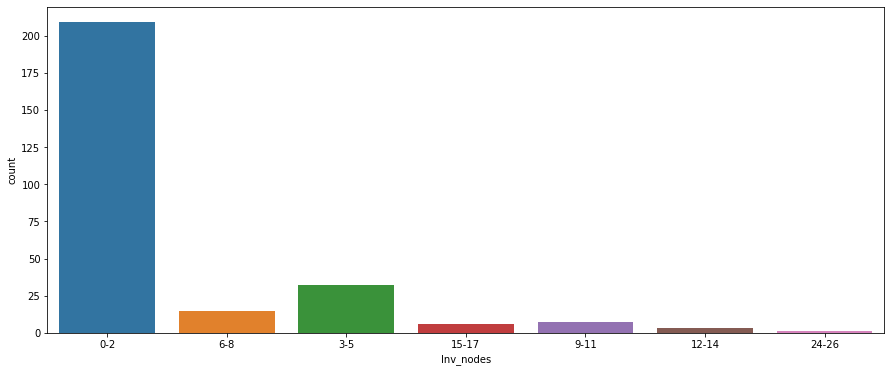

In [27]:
plt.figure(figsize=(15,6))
sns.countplot('Inv_nodes', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [28]:
training_data.Node_caps.unique()

array(['no', 'yes', '?'], dtype=object)

In [29]:
training_data.Node_caps.value_counts()

no     217
yes     51
?        5
Name: Node_caps, dtype: int64

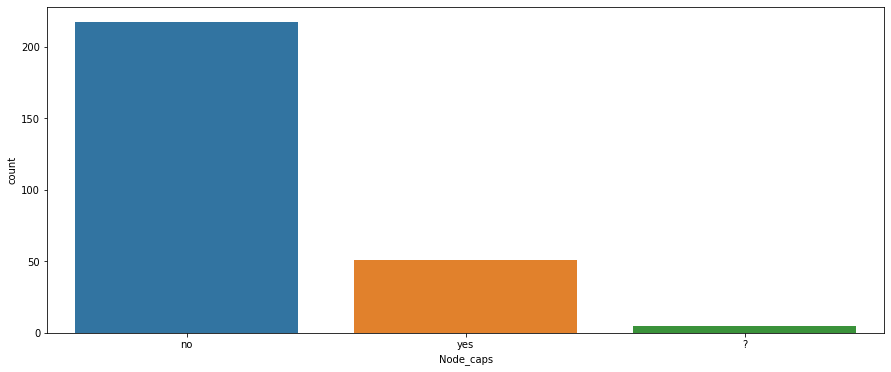

In [30]:
plt.figure(figsize=(15,6))
sns.countplot('Node_caps', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [31]:
training_data.Deg_malig.unique()

array([3, 2, 1], dtype=int64)

In [32]:
training_data.Deg_malig.value_counts()

2    123
3     81
1     69
Name: Deg_malig, dtype: int64

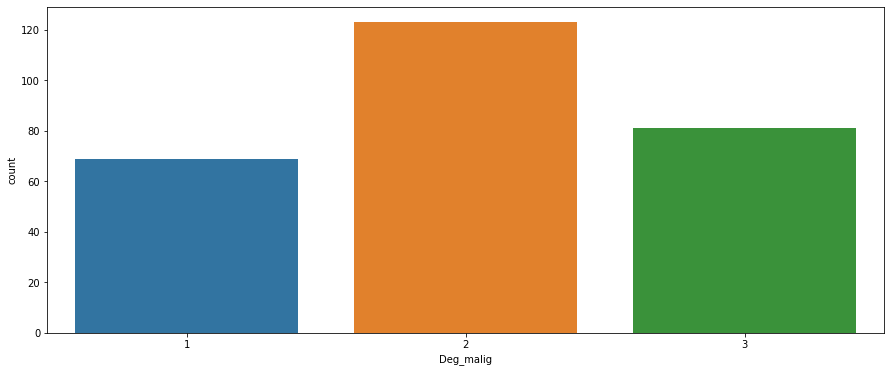

In [33]:
plt.figure(figsize=(15,6))
sns.countplot('Deg_malig', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [34]:
training_data.Breast.unique()

array(['left', 'right'], dtype=object)

In [35]:
training_data.Breast.value_counts()

left     146
right    127
Name: Breast, dtype: int64

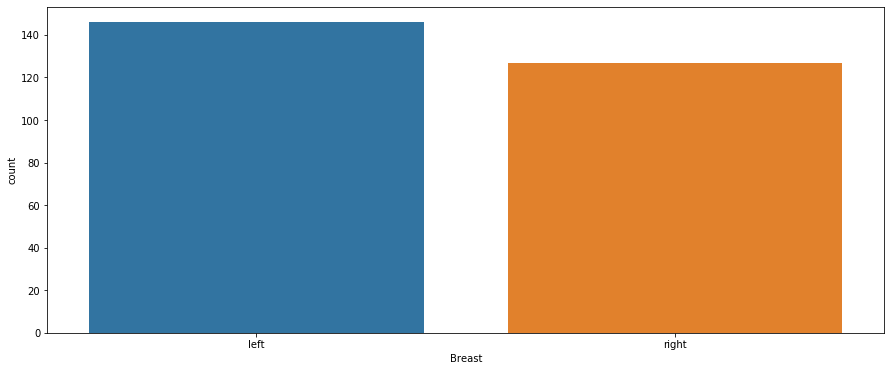

In [36]:
plt.figure(figsize=(15,6))
sns.countplot('Breast', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [37]:
training_data.Breast_quad.unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

In [38]:
training_data.Breast_quad.value_counts()

left_low     109
left_up       89
right_up      30
right_low     24
central       20
?              1
Name: Breast_quad, dtype: int64

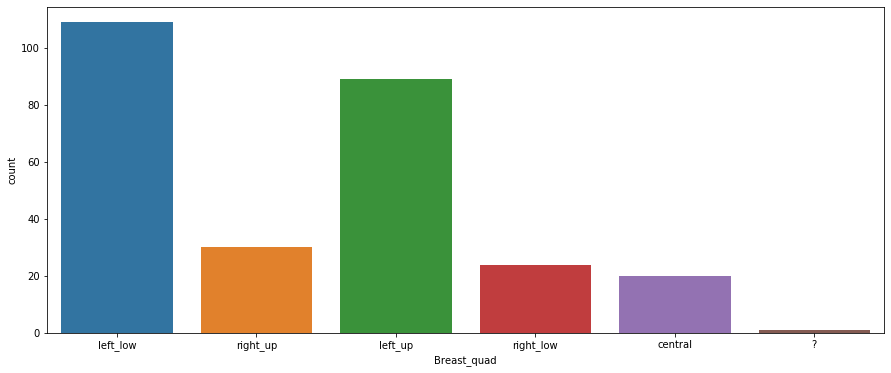

In [39]:
plt.figure(figsize=(15,6))
sns.countplot('Breast_quad', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [40]:
training_data.Irradiat.unique()

array(['no', 'yes'], dtype=object)

In [41]:
training_data.Irradiat.value_counts()

no     213
yes     60
Name: Irradiat, dtype: int64

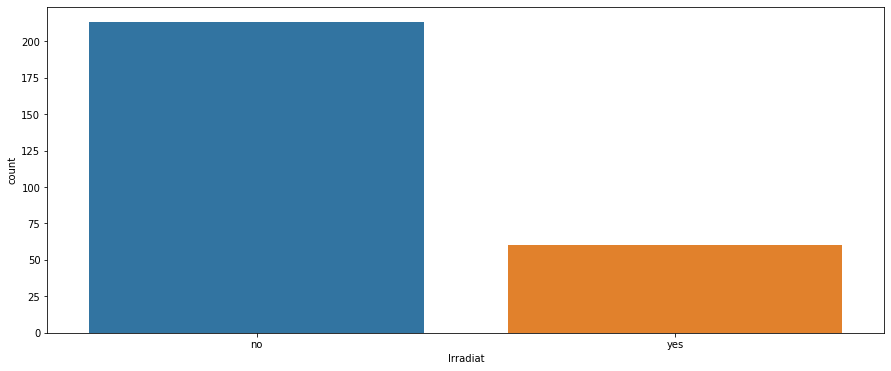

In [42]:
plt.figure(figsize=(15,6))
sns.countplot('Irradiat', data = training_data)
plt.xticks(rotation = 0)
plt.show()

In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [44]:
training_data['Class']= label_encoder.fit_transform(training_data['Class'])
training_data['Age']= label_encoder.fit_transform(training_data['Age'])
training_data['Menopause']= label_encoder.fit_transform(training_data['Menopause'])
training_data['Tumor_size']= label_encoder.fit_transform(training_data['Tumor_size'])
training_data['Inv_nodes']= label_encoder.fit_transform(training_data['Inv_nodes'])
training_data['Node_caps']= label_encoder.fit_transform(training_data['Node_caps'])
training_data['Breast']= label_encoder.fit_transform(training_data['Breast'])
training_data['Breast_quad']= label_encoder.fit_transform(training_data['Breast_quad'])
training_data['Irradiat']= label_encoder.fit_transform(training_data['Irradiat'])

In [45]:
training_data.head()

,Class,Age,Menopause,Tumor_size,Inv_nodes,Node_caps,Deg_malig,Breast,Breast_quad,Irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


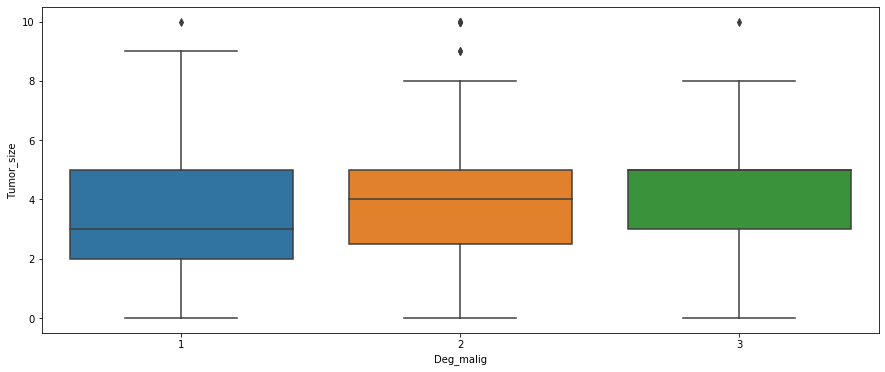

In [46]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Deg_malig', y = 'Tumor_size', data = training_data)
plt.xticks(rotation = 0)
plt.show()

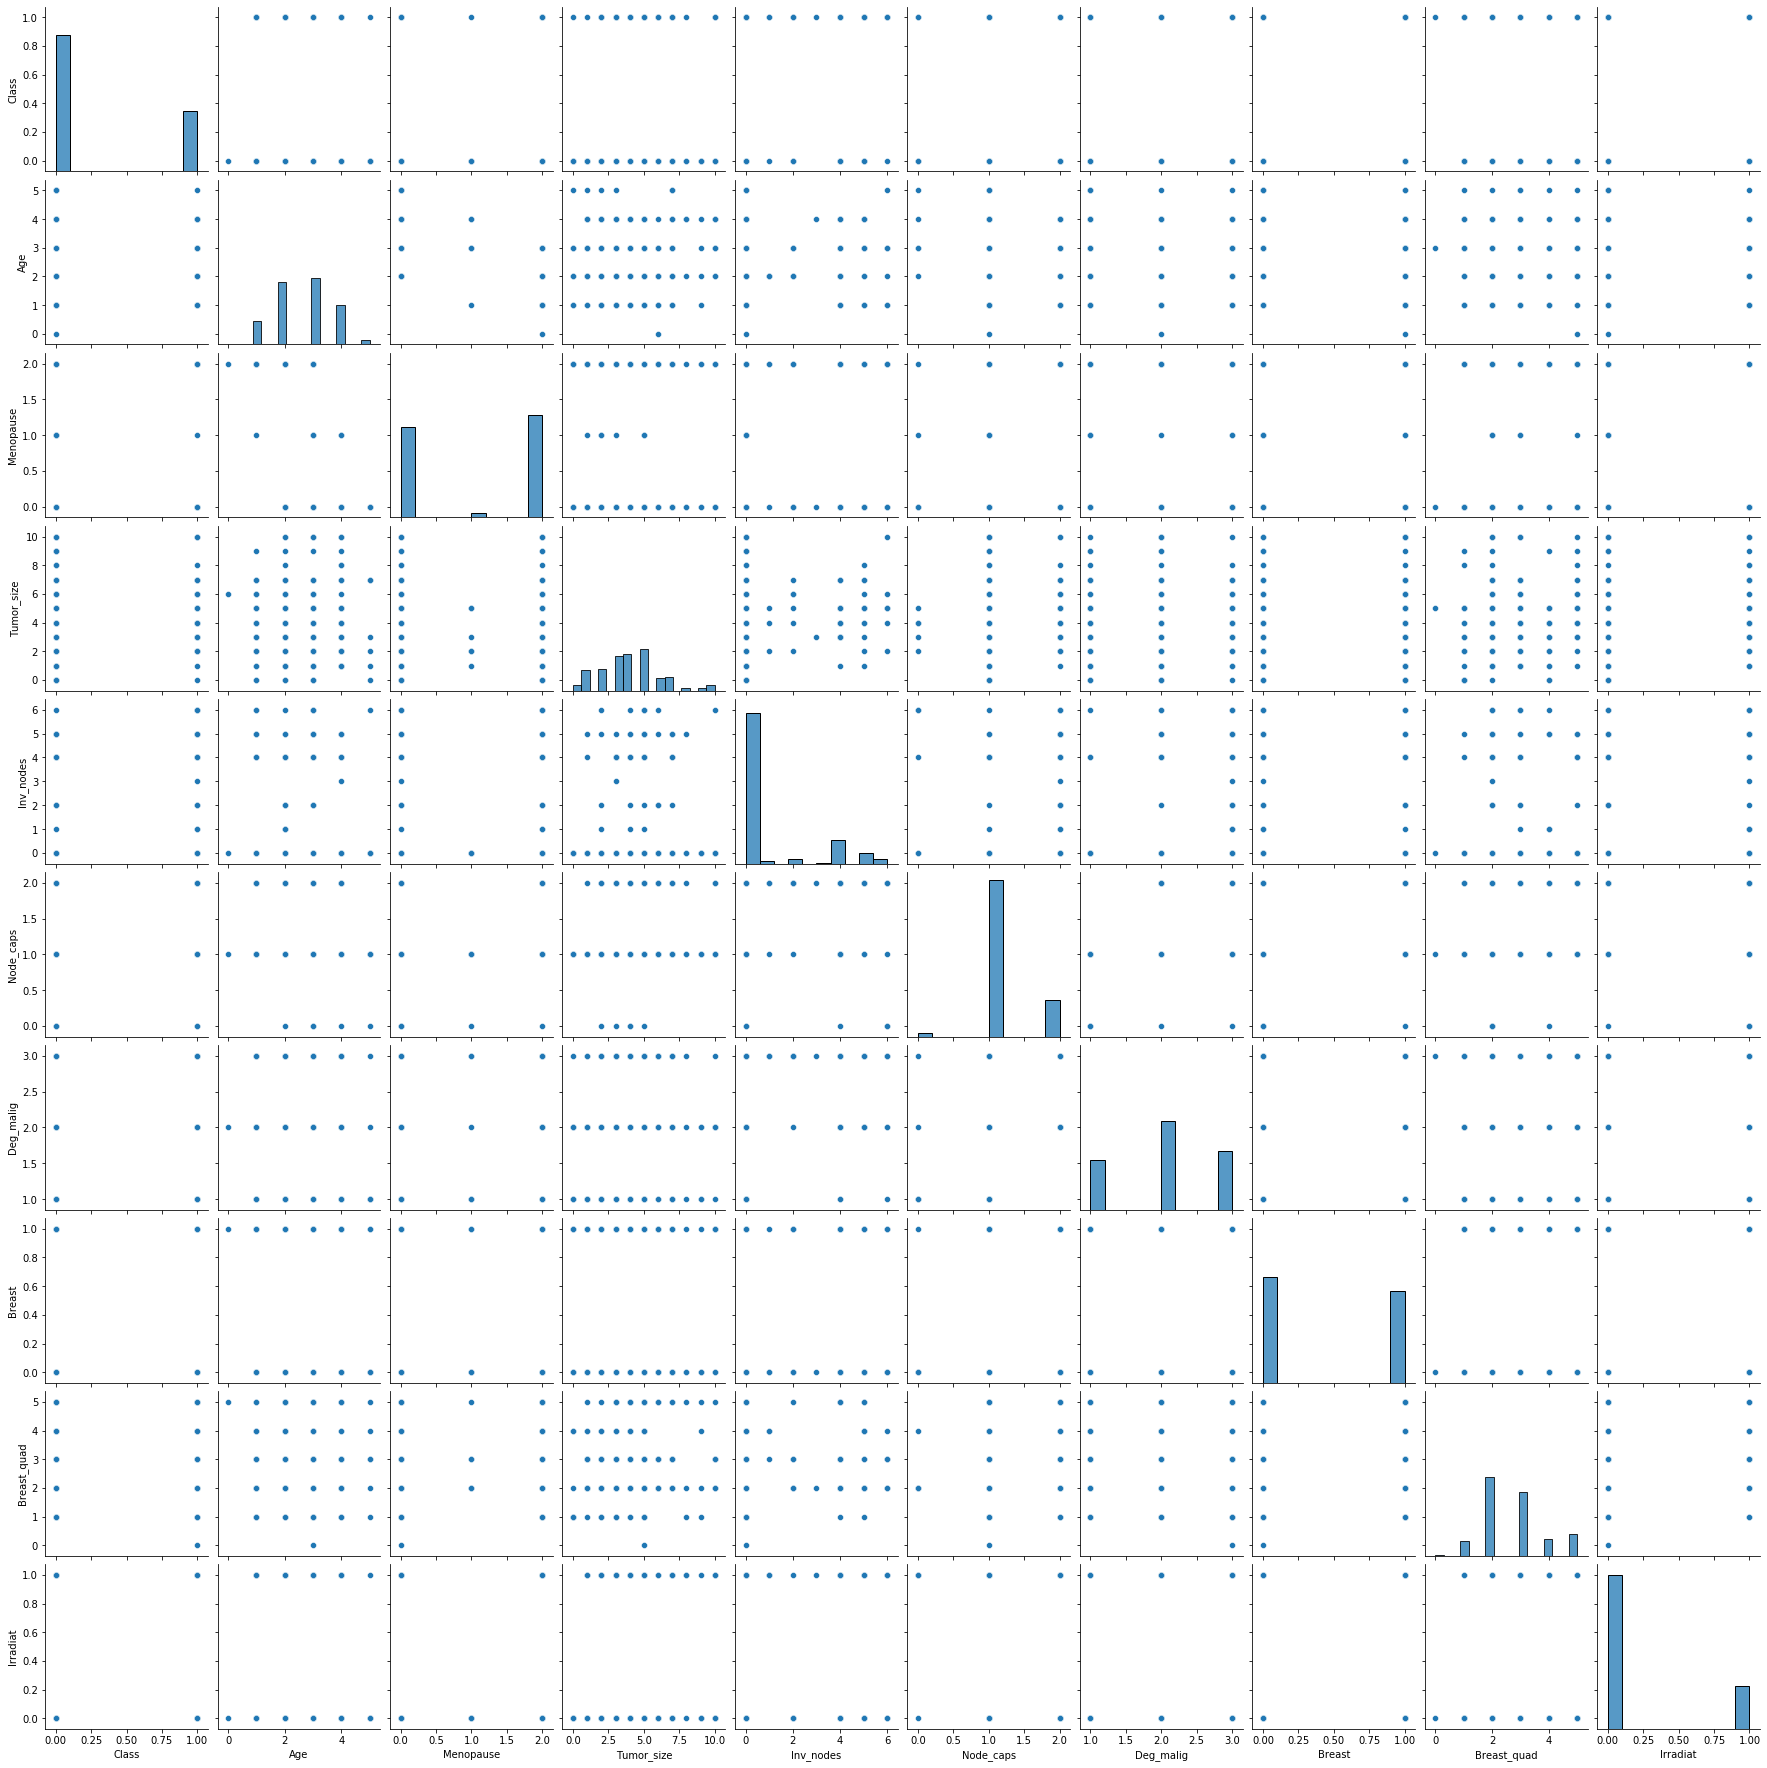

In [47]:
sns.pairplot(training_data)

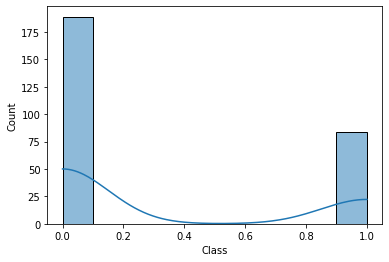

In [48]:
sns.histplot(data = training_data['Class'], kde = True)

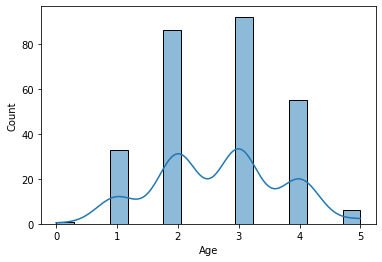

In [49]:
sns.histplot(data = training_data['Age'], kde = True)

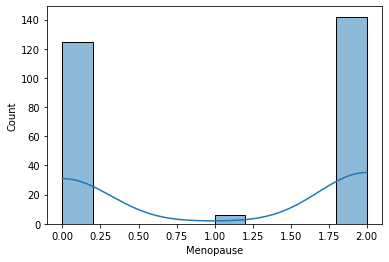

In [50]:
sns.histplot(data = training_data['Menopause'], kde = True)

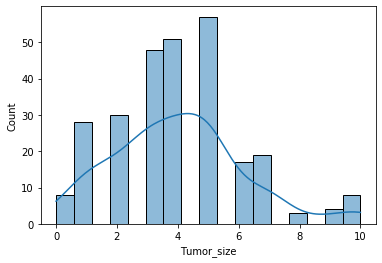

In [51]:
sns.histplot(data = training_data['Tumor_size'], kde = True)

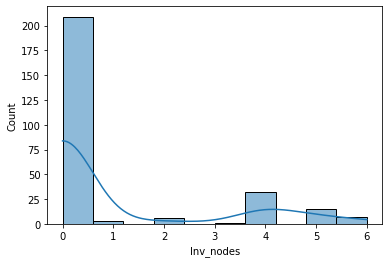

In [52]:
sns.histplot(data = training_data['Inv_nodes'], kde = True)

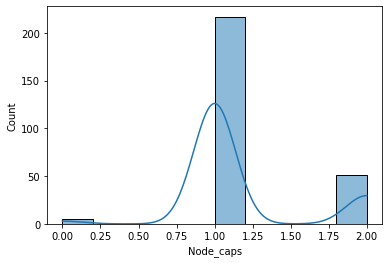

In [53]:
sns.histplot(data = training_data['Node_caps'], kde = True)

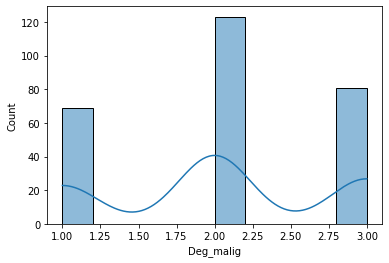

In [54]:
sns.histplot(data = training_data['Deg_malig'], kde = True)

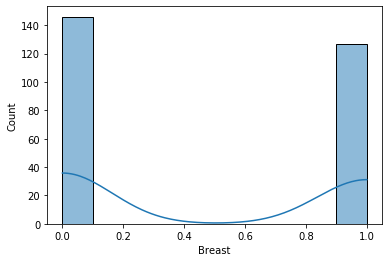

In [55]:
sns.histplot(data = training_data['Breast'], kde = True)

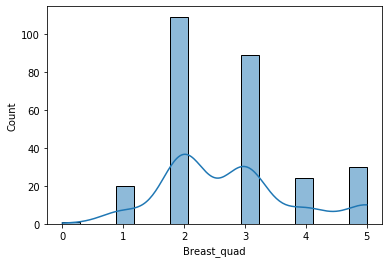

In [56]:
sns.histplot(data = training_data['Breast_quad'], kde = True)

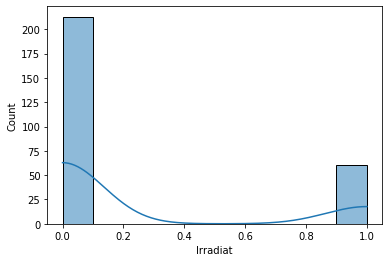

In [57]:
sns.histplot(data = training_data['Irradiat'], kde = True)

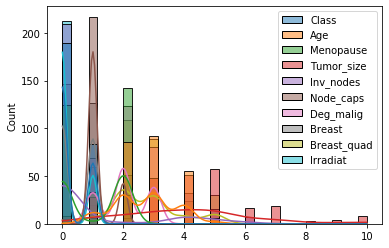

In [58]:
sns.histplot(data = training_data, kde = True)

In [59]:
test_data = pd.read_csv('Test_Breast_Cancer.csv')

In [60]:
test_data.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up,NaN
1,no-recurrence-events,50-59,premeno,25-29,NaN,yes,2,left,left_up,NaN
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up,NaN
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up,NaN
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up,NaN


In [61]:
test_data.tail()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up,NaN
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up,NaN
7,no-recurrence-events,60-69,ge40,30-34,NaN,no,2,left,left_low,NaN
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central,NaN
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,NaN


In [62]:
test_data.shape

(10, 10)

In [63]:
test_data.columns

Index(['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps',
       'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'],
      dtype='object')

In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        10 non-null     object 
 1   Age          10 non-null     object 
 2   Menopause    10 non-null     object 
 3   Tumor-size   10 non-null     object 
 4   Inv-nodes    8 non-null      object 
 5   Node-caps    10 non-null     object 
 6   Deg-malig    10 non-null     int64  
 7   Breast       10 non-null     object 
 8   Breast-quad  10 non-null     object 
 9   Irradiat     0 non-null      float64
dtypes: float64(1), int64(1), object(8)
memory usage: 928.0+ bytes


In [65]:
test_data.describe()

,Deg-malig,Irradiat
count,10.000000,0.0
mean,2.300000,NaN
std,0.483046,NaN
min,2.000000,NaN
25%,2.000000,NaN
50%,2.000000,NaN
75%,2.750000,NaN
max,3.000000,NaN


In [66]:
test_data.isnull().sum()

Class           0
Age             0
Menopause       0
Tumor-size      0
Inv-nodes       2
Node-caps       0
Deg-malig       0
Breast          0
Breast-quad     0
Irradiat       10
dtype: int64

In [67]:
test_data = test_data.drop(['Irradiat'], axis = 1)

In [68]:
test_data.dropna(inplace = True)

In [69]:
test_data.isnull().sum()

Class          0
Age            0
Menopause      0
Tumor-size     0
Inv-nodes      0
Node-caps      0
Deg-malig      0
Breast         0
Breast-quad    0
dtype: int64

In [70]:
test_data = test_data.rename(columns={'Tumor-size': 'Tumor_size', 
                                              'Inv-nodes': 'Inv_nodes',
                                             'Node-caps': 'Node_caps',
                                             'Deg-malig': 'Deg_malig',
                                             'Breast-quad': 'Breast_quad'})

In [71]:
test_data

,Class,Age,Menopause,Tumor_size,Inv_nodes,Node_caps,Deg_malig,Breast,Breast_quad
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up


In [72]:
test_data['Class']= label_encoder.fit_transform(test_data['Class'])
test_data['Age']= label_encoder.fit_transform(test_data['Age'])
test_data['Menopause']= label_encoder.fit_transform(test_data['Menopause'])
test_data['Tumor_size']= label_encoder.fit_transform(test_data['Tumor_size'])
test_data['Inv_nodes']= label_encoder.fit_transform(test_data['Inv_nodes'])
test_data['Node_caps']= label_encoder.fit_transform(test_data['Node_caps'])
test_data['Breast']= label_encoder.fit_transform(test_data['Breast'])
test_data['Breast_quad']= label_encoder.fit_transform(test_data['Breast_quad'])

In [73]:
x = training_data.drop(['Irradiat'], axis = 1)
y = training_data.Irradiat

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred = model.predict(X_test)

In [78]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.7696335078534031
Testing Accuracy : 0.8292682926829268


In [79]:
y_pred1 = model.predict(test_data)

In [80]:
print(y_pred1)

[0 0 0 0 0 0 0 0]


In [81]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [82]:
print("\n Classification report for classifier %s:\n%s\n" % (model, 
                                                             metrics.classification_report(y_test, y_pred)))


 Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        66
           1       0.67      0.25      0.36        16

    accuracy                           0.83        82
   macro avg       0.75      0.61      0.63        82
weighted avg       0.81      0.83      0.80        82




In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[64  2]
 [12  4]]
